# 시계열 분석 (Auto ARIMA)
- `최적의 ARIMA 모델을 자동으로 찾아서 검색을 수행`해 주는 기능

## 1. 작업 준비
### 1) 패키지 및 데이터 가져오기
- `pmdarima` 패키지 설치 필요

In [22]:
from pandas import read_excel, DatetimeIndex
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from pmdarima.arima import auto_arima
import seaborn as sb
import sys

In [23]:
df = read_excel('https://data.hossam.kr/E06/air_passengers.xlsx', 
                index_col="Month")
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### 2) 그래프 초기화

In [24]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

### 3) 가져온 데이터의 인덱스를 날짜 형식으로 수정

In [25]:
df.index = DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

## 2. 데이터 분석
### 1) 데이터 분할
- 원본 데이터를 보통 분석모델 구축용 (학습용)으로 70%, 검증용으로 30% 분할한다. (비율은 정해져있지 않으나 보통 7:3으로 함)
- 기본적으로 7:3 데이터는 `랜덤`으로 뽑으나, `시계열(순서가 있음)인 경우` 랜덤으로 할 경우 데이터 분석이 어려움으로 `처음서부터 70%, 나머지 30%로 분할`함

#### 처음부터 70% 위치까지의 데이터 (학습용 데이터)
- 분석모델 구축용 (=학습용) 데이터

In [26]:
train = df[:int(0.7*len(df))]
train

,Passengers
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1956-12-01,306
1957-01-01,315
1957-02-01,301
1957-03-01,356


#### 나머지 30% 데이터 (검증용 데이터)

In [27]:
# 70% 위치부터 끝까지 분할
test = df[int(0.7*len(df)):]
test

,Passengers
1957-05-01,355
1957-06-01,422
1957-07-01,465
1957-08-01,467
1957-09-01,404
1957-10-01,347
1957-11-01,305
1957-12-01,336
1958-01-01,340
1958-02-01,318


### 2) 모델 구축
- 시계열 데이터를 `계절 ARIMA 모델에 맞추려고 할 때` 
    - 첫 번째 목표는 측정항목을 최적화하는 `ARIMA(p,d,q)(P,D,Q)M 값을 찾는 것`이다
    - `M값`을 `고정`한 상태에서 `0부터 (p, d, q)(P, D, Q)`로 주어진 값의 범위 안에서 `최적의 값을 검색`한다.
- 오래 걸린다.ㅋㅋㅋ

In [29]:
my_p = 3    # 적절히 넉넉히 (보통 1~3 해도 됨; 너무 숫자가 크면 로딩 시간 오래걸림)
# my_p = 5  # 시간 있을 떈 이렇게 해봐도 됨 - 더 정확한 결과가 나올 것임
my_d = 2    # 차분 횟수 (검증한 결과 활용)
my_q = 3    # 적절히 넉넉히 (보통 1~3 해도 됨; 너무 숫자가 크면 로딩 시간 오래걸림)
# my_q = 5  # 시간 있을 떈 이렇게 해봐도 됨 - 더 정확한 결과가 나올 것임
my_s = 12   # 계절성 주기 (분석가(나 자신)가 데이터의 특성을 고려하여 판단)

model = auto_arima(
    y = train,      # 모델링하려는 시계열 데이터 또는 배열
    start_p = 0,    # p의 시작점
    max_p = my_p,       # p의 최댓값
    d = my_d,       # 차분 횟수
    start_q = 0,    # q의 시작점
    max_q = my_q,       # q의 최댓값
    seasonal = True,# 계절성 사용 여부
    m = my_s,       # 계절성 주기
    start_P = 0,    # P의 시작점
    max_P = my_p,       # P의 최댓값
    D = my_d,       # 계절성 차분 횟수
    start_Q = 0,    # Q의 시작점
    max_Q = my_q,       # Q의 최댓값
    trace = True    # 학습 과정 표시 여부
)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,2,0)[12]             : AIC=700.560, Time=0.02 sec
 ARIMA(1,2,0)(1,2,0)[12]             : AIC=628.108, Time=1.18 sec
 ARIMA(0,2,1)(0,2,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(1,2,0)(0,2,0)[12]             : AIC=656.611, Time=0.05 sec
 ARIMA(1,2,0)(2,2,0)[12]             : AIC=618.256, Time=1.47 sec
 ARIMA(1,2,0)(3,2,0)[12]             : AIC=614.066, Time=2.19 sec
 ARIMA(1,2,0)(3,2,1)[12]             : AIC=inf, Time=8.21 sec
 ARIMA(1,2,0)(2,2,1)[12]             : AIC=inf, Time=2.65 sec
 ARIMA(0,2,0)(3,2,0)[12]             : AIC=652.212, Time=1.12 sec
 ARIMA(2,2,0)(3,2,0)[12]             : AIC=606.557, Time=2.09 sec
 ARIMA(2,2,0)(2,2,0)[12]             : AIC=612.571, Time=1.10 sec
 ARIMA(2,2,0)(3,2,1)[12]             : AIC=inf, Time=6.57 sec
 ARIMA(2,2,0)(2,2,1)[12]             : AIC=inf, Time=3.39 sec
 ARIMA(3,2,0)(3,2,0)[12]             : AIC=604.074, Time=3.33 sec
 ARIMA(3,2,0)(2,2,0)[12]             : AIC=607.624, T

### 3) 모델 학습
- `관측치(실 데이터)를 모델에 적제`하여 `학습을 수행`한다.

In [30]:
model.fit(train)

ARIMA(order=(3, 2, 0), scoring_args={}, seasonal_order=(3, 2, 0, 12),
      suppress_warnings=True, with_intercept=False)

### 4) 잔차 플롯 (Residual Plot) 검토
- `모델.plot_diagnostics()`

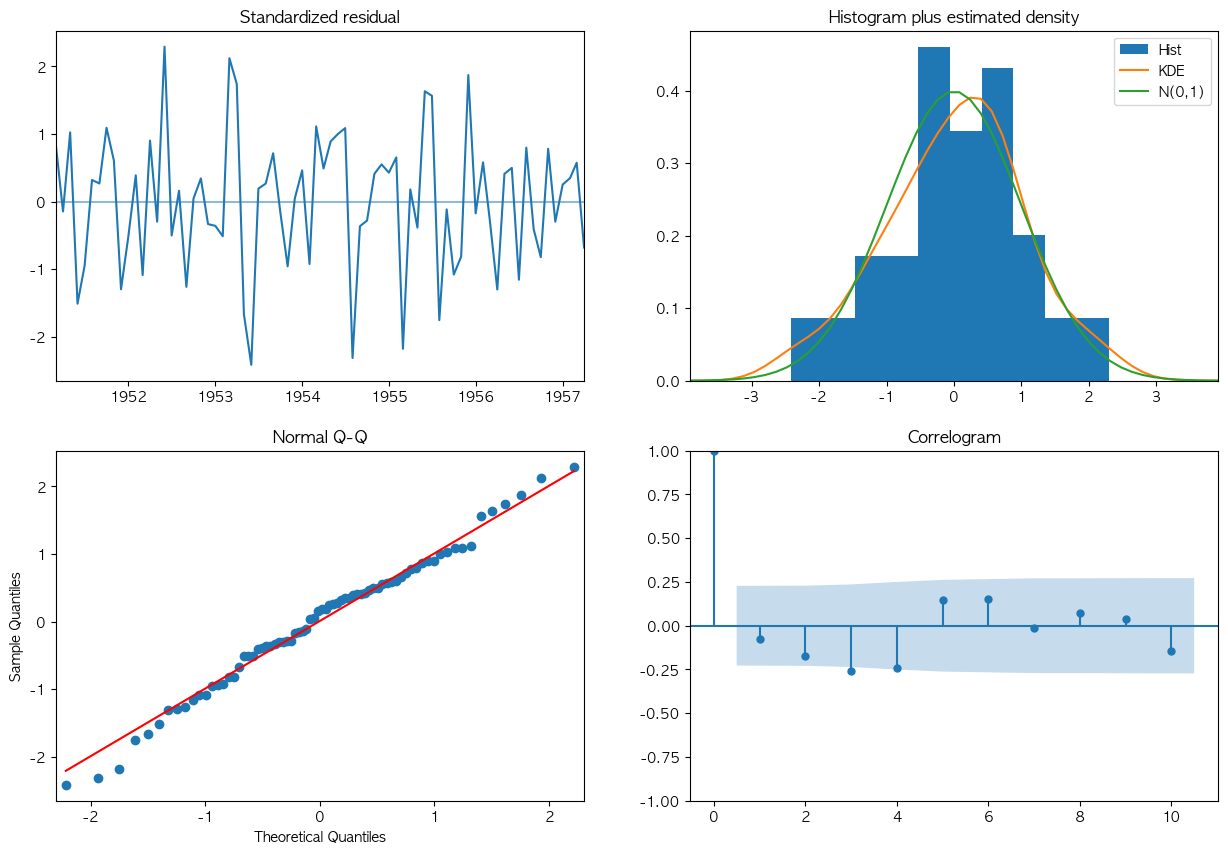

In [31]:
model.plot_diagnostics(figsize = (15, 10))
plt.show()
plt.close()

> - 왼쪽 상단: 잔차 오차는 평균 `0을 중심으로 변동`하고 `균일한 분산`을 갖는 것으로 보임
> - 오른쪽 상단: `밀도 도표`는 `평균이 0인 정규 분포를 나타냄`
> - 왼쪽 하단: 모든 점이 `빨간색 선과 완벽하게 일치해야 함`. `편차가 크면 분포가 왜곡되었음을 의미`
> - 오른쪽 하단: 상관관계도(=ACF 플롯)는 `잔차 오류가 자동 상관되지 않음을 보여줌`. 모든 자기상관은 모델에서 설명되지 않는 `잔차 오류에 일부 패턴이 있음을 의미`하기 때문에 `모델에 대해 더 많은 X(예측 변수)를 찾아야 함`.
>
> 결과: 전반적으로 잘 맞는 것 같음.

### 5) 예상치 생성
- 학습 결과를 토대로 주어진 `n_periods` 수 만큼의 이후 데이터를 예상하여 결과 반환

In [32]:
# 원본 데이터 이후 10 단계 까지 예측
y_predict = model.predict(n_periods = int(len(test)+10))
y_predict

1957-05-01    355.463949
1957-06-01    411.566879
1957-07-01    464.386217
1957-08-01    443.121618
1957-09-01    393.594239
1957-10-01    337.051270
1957-11-01    295.128572
1957-12-01    335.512763
1958-01-01    345.736976
1958-02-01    328.285526
1958-03-01    380.786318
1958-04-01    371.503603
1958-05-01    381.853728
1958-06-01    452.355500
1958-07-01    511.189226
1958-08-01    482.927000
1958-09-01    428.016939
1958-10-01    363.203821
1958-11-01    319.189179
1958-12-01    364.246325
1959-01-01    375.564916
1959-02-01    358.904516
1959-03-01    412.373595
1959-04-01    402.683549
1959-05-01    411.841277
1959-06-01    490.512431
1959-07-01    552.516491
1959-08-01    520.295941
1959-09-01    458.823021
1959-10-01    384.096735
1959-11-01    333.748691
1959-12-01    382.690330
1960-01-01    391.804885
1960-02-01    371.224956
1960-03-01    431.132497
1960-04-01    416.287595
1960-05-01    428.004984
1960-06-01    513.769575
1960-07-01    577.851184
1960-08-01    541.330684


### 6) 관측치와 예상치 비교

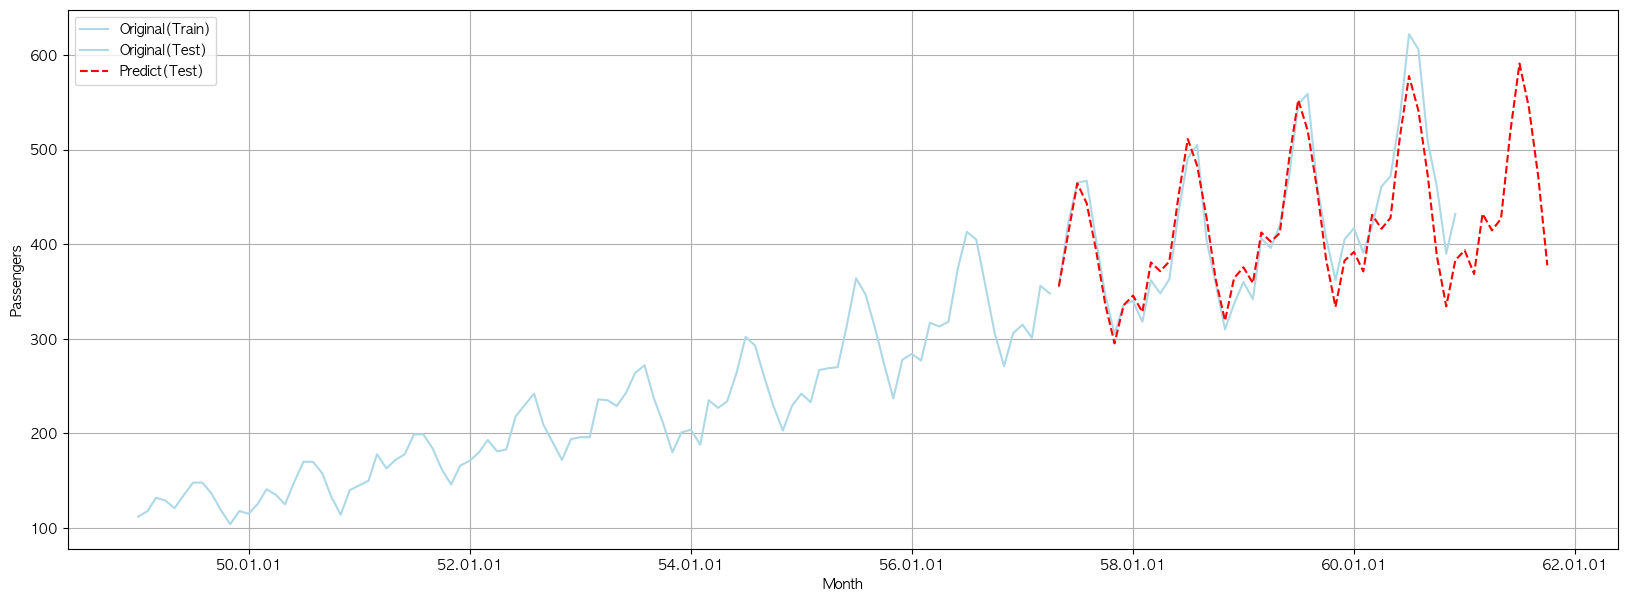

In [33]:
plt.figure(figsize = (20, 7))

# 앞 70%의 원본 데이터
sb.lineplot(data = train,
            x = train.index,
            y = 'Passengers',
            label = 'Original(Train)',
            color = 'lightblue')
# 뒤 30%의 원본 데이터
sb.lineplot(data = test,
            x = test.index,
            y = 'Passengers',
            label = 'Original(Test)',
            color = 'lightblue')

# 뒤 30% + 이후 10 단계에 대한 예측 데이터
sb.lineplot(x = y_predict.index,
             y = y_predict.values,
             label = 'Predict(Test)',
             linestyle = '--',
             color = 'red')

plt.xlabel('Month')
plt.ylabel('Passengers')

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()

> 전 파일(4_시계열_분석(정석).ipynb)의 정석으로 한 시계열 분석 결과에 비해 예측결과가 비교적 보수적임을 알 수 있다 (값이 잘 변화하지 않음)

- 시계열 분석에서 (auto)의 예측값이 (정석)의 예측값보다 보통 보수적인 편이라고 한다.